---
# Assignment: Clustering and PCA

#### Brief steps to be followed:

1. Read and understand the data


2. Visualize the data


3. Prepare the data


4. Modelling


5. Analyse the model


6. Recommendations

---

## 1. Read and understand the data

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import relevant packages for reading and understanding the data
import numpy as np
import pandas as pd
pd.set_option('max_columns',None)

In [3]:
# load the data and check head
country_df = pd.read_csv('country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# check shape of the data frame
country_df.shape

(167, 10)

There are 167 rows and 10 columns. Essentially there are 167 different countries and their data.

In [5]:
# check info
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


1. All the columns have a total of 167 rows, which means there are no missing values, still we will check for them later.<br>
2. All the columns are numeric, except for the 'country' column, which is of object type

#### The columns named 'exports', 'health', and 'imports' are given in terms of % of total GDP (as per the data dictionary). The values of these columns need to be treated. 
Procedure: 
- Calculate the new values as (old value / 100)*gdpp 
- Replace the original values with the newly calculated values to their respective columns

In [6]:
# calculate new values for 'exports', 'health', and 'imports'
country_df['exports'] = country_df['exports'] / 100 * country_df['gdpp']
country_df['health'] = country_df['health'] / 100 * country_df['gdpp']
country_df['imports'] = country_df['imports'] / 100 * country_df['gdpp']

In [7]:
# check head again
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
# check summary of numerical features
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
# check for missing values
print(100*(country_df.isnull().sum(axis=0)/country_df.shape[0]))

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64


There are indeed no missing values

## 2. Visualize the data


In [10]:
# import packages for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### 2.1 Numerical Data Visualization

In [11]:
# check correlation amongst numerical data
country_df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


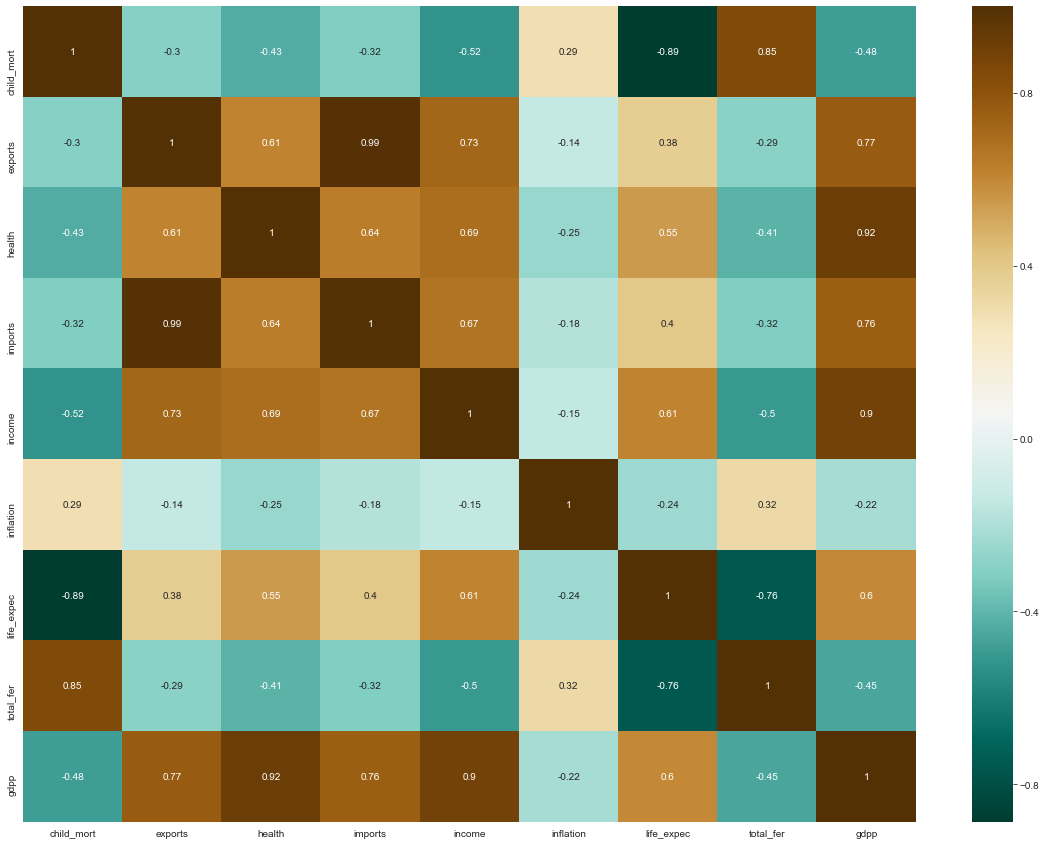

In [12]:
# Visualize numerical data
plt.figure(figsize=(20,15))
sns.heatmap(country_df.corr(),annot=True,cmap='BrBG_r')
plt.show()

The following features are highly correlated with each other:

|Features|Correlation|
|--|--|
|exports & imports| **+0.99**|
|health & gdpp| **+0.92**|
|income & gdpp| **+0.90**|
|child_mort & total_fer| **-0.89**|
|child_mort & life_expec| **+0.85**|
|exports & gdpp| **+0.77**|
|imports & gdpp| **+0.76**|
|total_fer & life_expec| **-0.76**|
|income & exports| **+0.73**|

In [13]:
# extract numerical columns from data frame
num_cols = list(country_df.select_dtypes(['int64','float64']).columns)
print(num_cols)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


<Figure size 1440x1440 with 0 Axes>

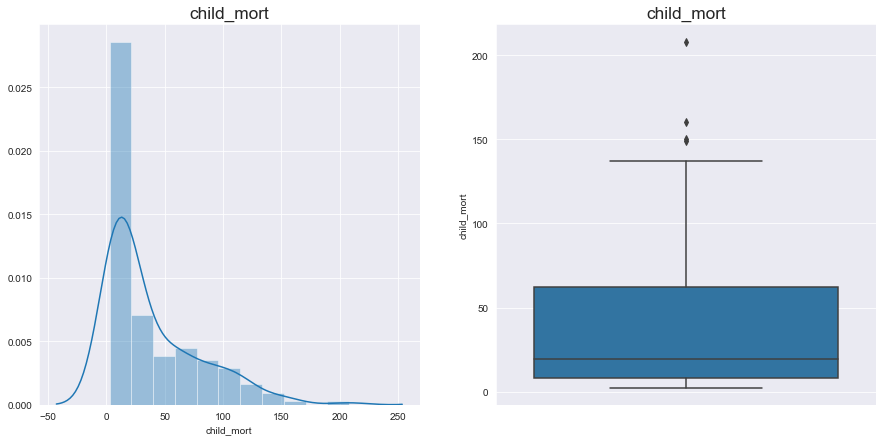

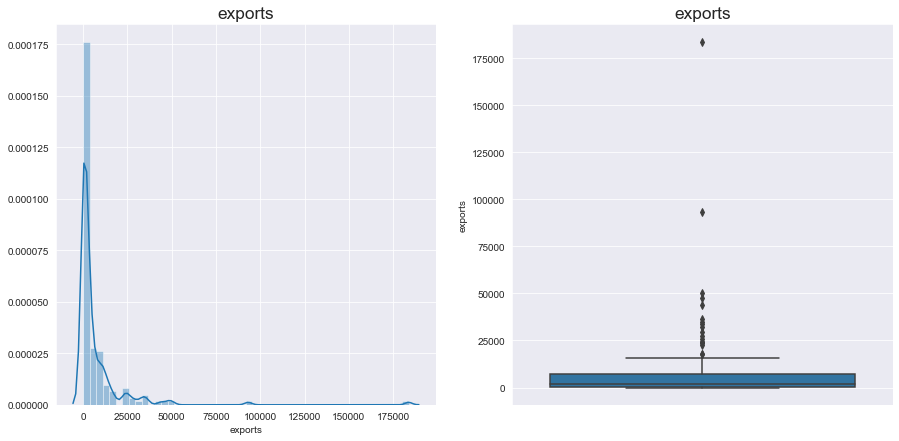

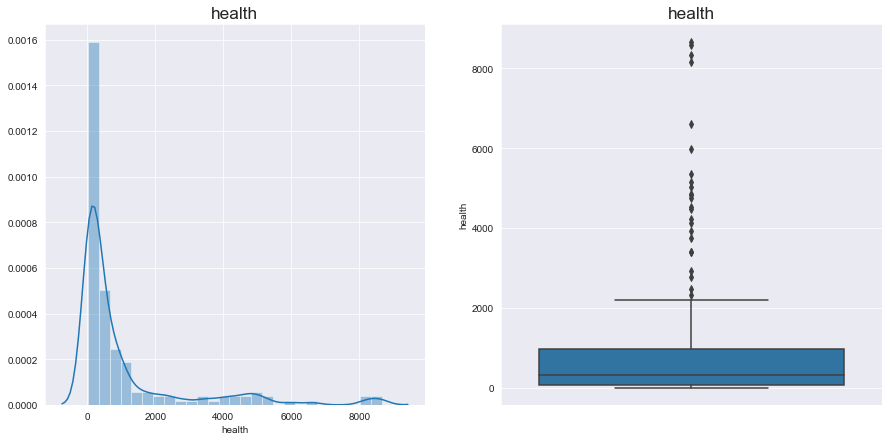

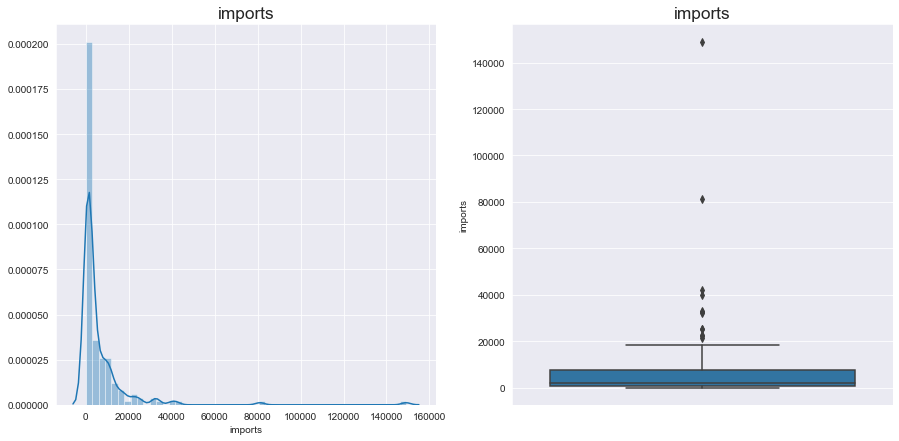

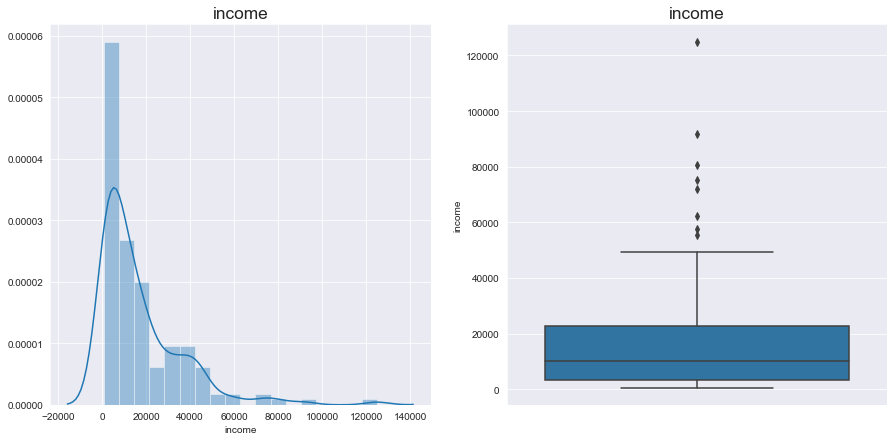

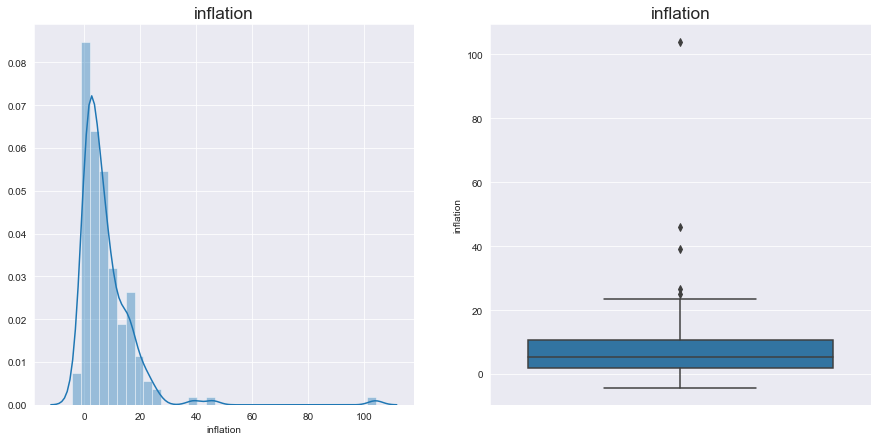

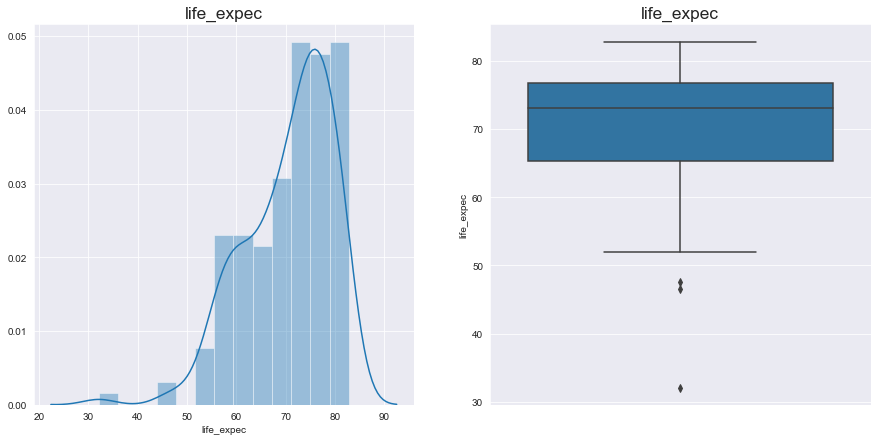

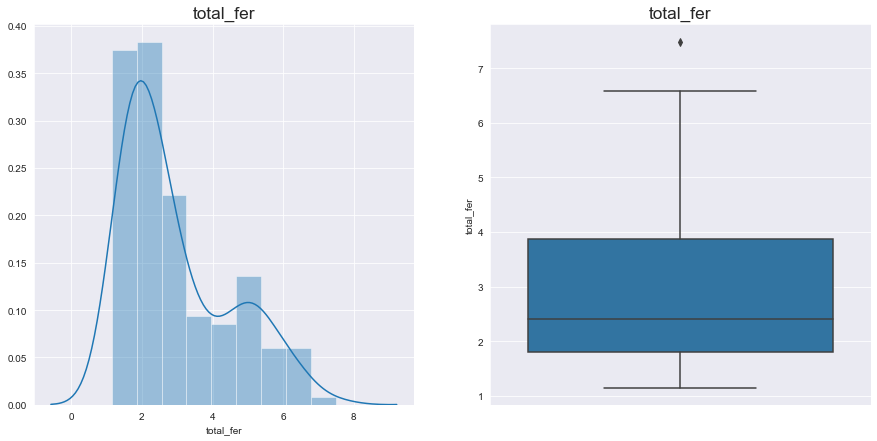

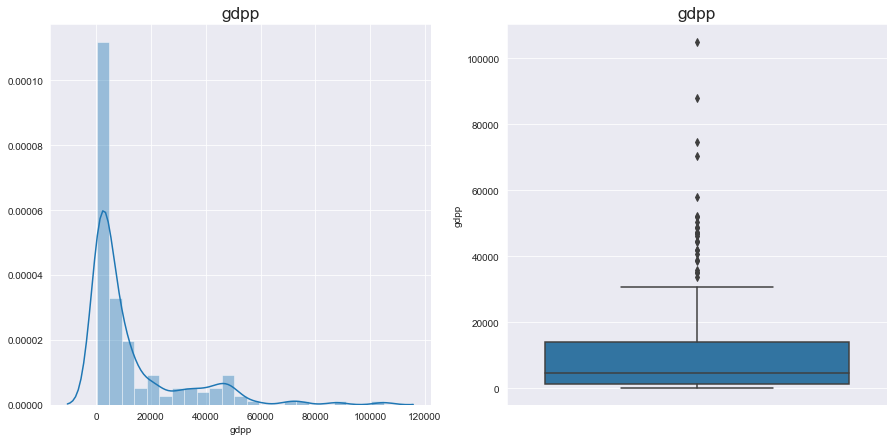

In [14]:
# plot distribution of numerical data
plt.figure(figsize=(20,20))
def plot(col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.title(col,fontsize='xx-large')
    sns.distplot(country_df[col])
    
    plt.subplot(1,2,2)
    plt.title(col,fontsize='xx-large')
    sns.boxplot(y=country_df[col])
    plt.show()

for col in num_cols:
    plot(col)

1. Looking at the Boxplots, there are outliers present for each and every feature. Some seem to have very few outliers and some seem to have huge number of outliers. 


2. The distribution of every numerical column has some amount of skewness in them. All the numerical features have skewness in the higher range except for the feature 'life_expec', which has skewness in the lower range. This observation also indicates that there are some outliers present in each column.

Let's check the count of outliers for each column to make sure of it.

In [15]:
# check count of outliers for all the numerical columns
# to check for an outlier, a convinient way is to find the data points, which falls more than 1.5 times the interquartile range
# above the third quartile or below the first quartile

Q1 = country_df.quantile(0.25)          # first quartile
Q3 = country_df.quantile(0.75)          # third quartile
IQR = Q3 - Q1                           # interquartile range

# print the columns with number of outliers present in them
print(((country_df[num_cols] < (Q1 - 1.5 * IQR)) | (country_df[num_cols] > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False))

gdpp          25
health        24
exports       18
imports       12
income         8
inflation      5
child_mort     4
life_expec     3
total_fer      1
dtype: int64


#### There are outliers present for each feature. The clustering can be performed in 2 ways as follows:
1. Create clusters **with the outliers**, and check if clustering has taken care of the outliers, i.e whether a separate cluster is formed for the outliers.


2. Create clusters **after treating the outliers**. This can be done in the following ways:
    1. For features that have less than equal to 5 outliers can be **capped**.
    2. For features that have more than 5 outliers can be **dropped**, since capping here will create unnecessary bias in the data.

### 2.2 Bivariate Data Visualization

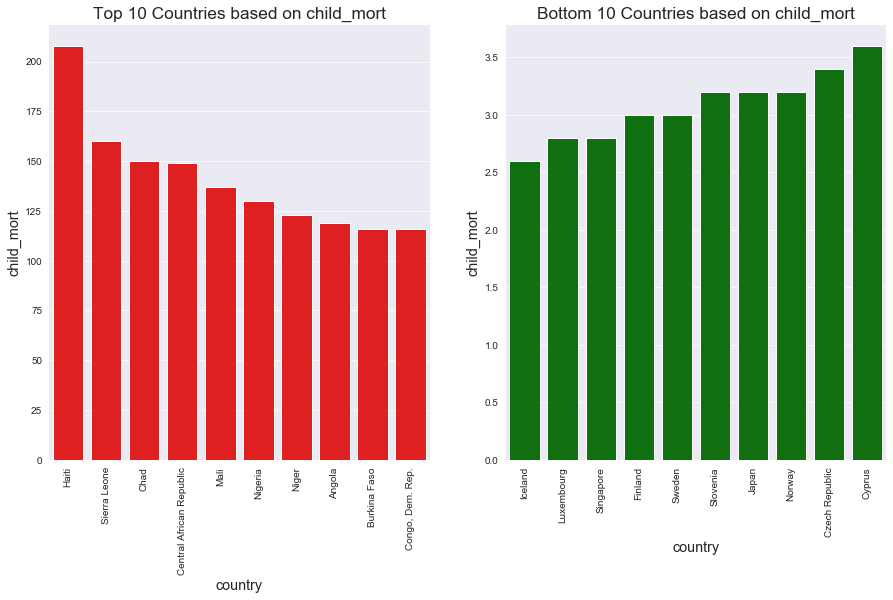

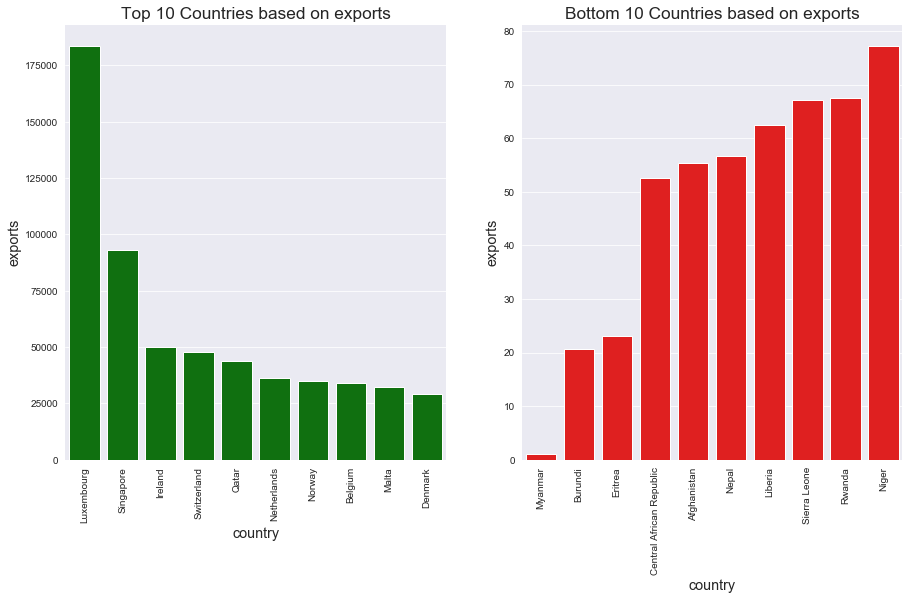

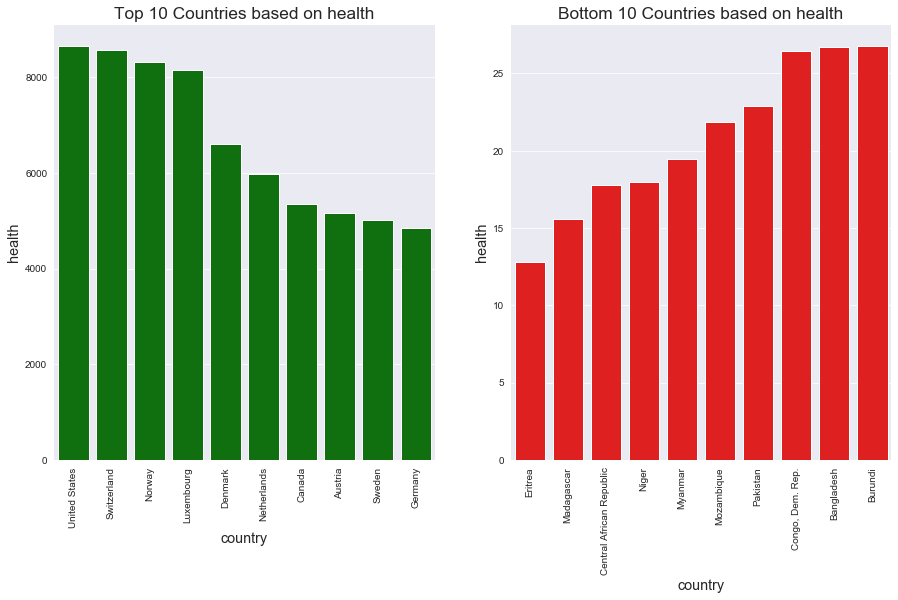

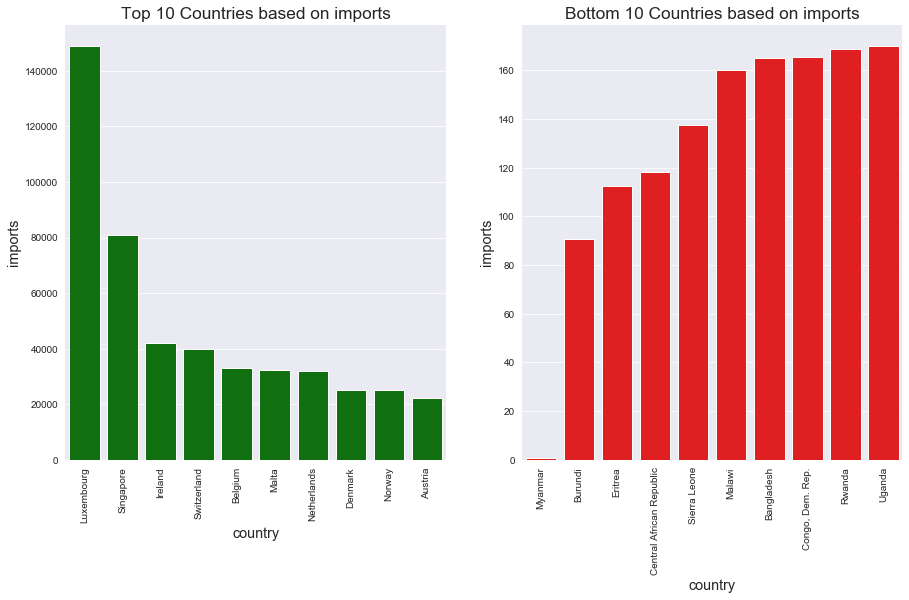

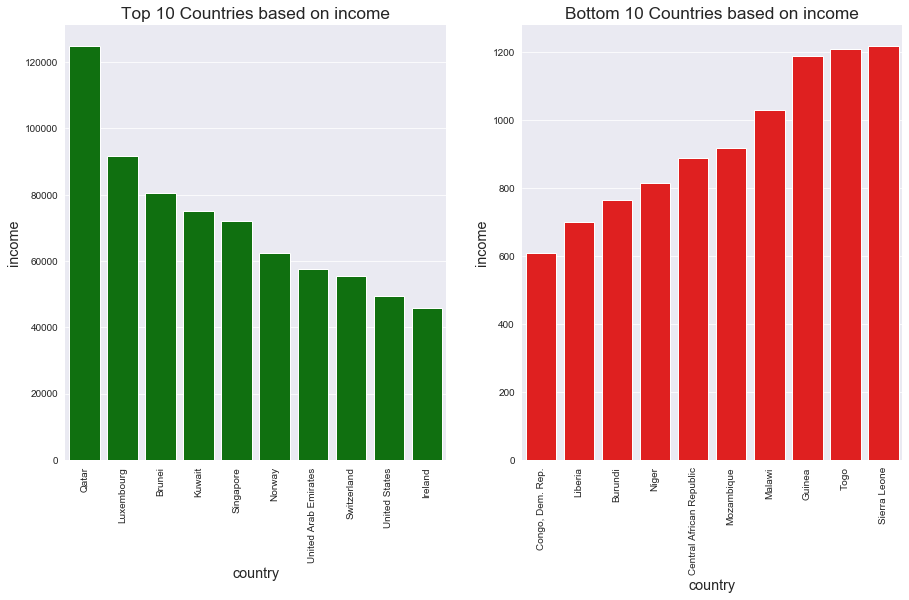

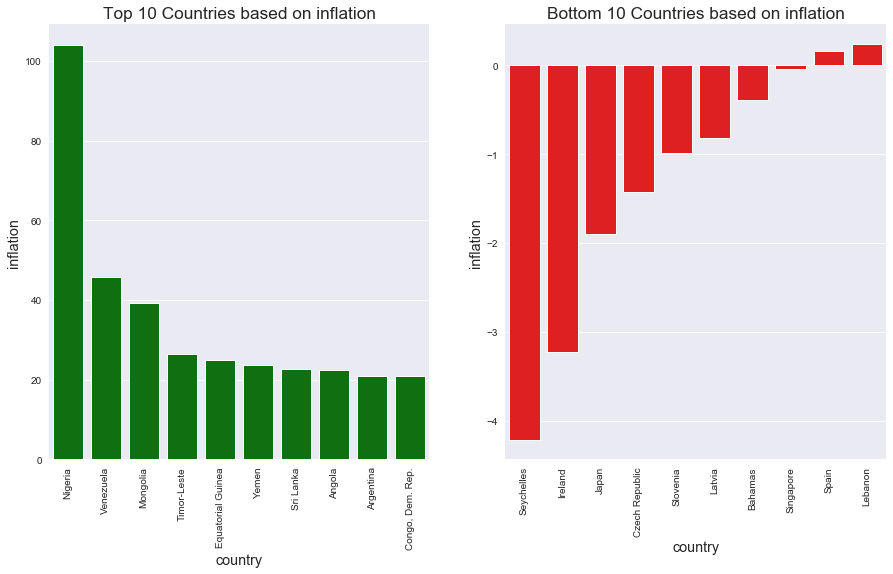

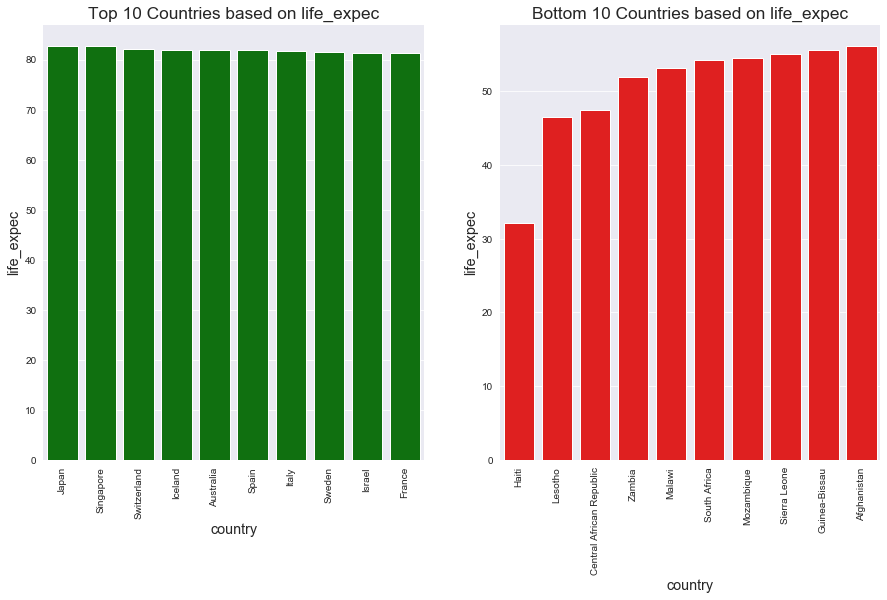

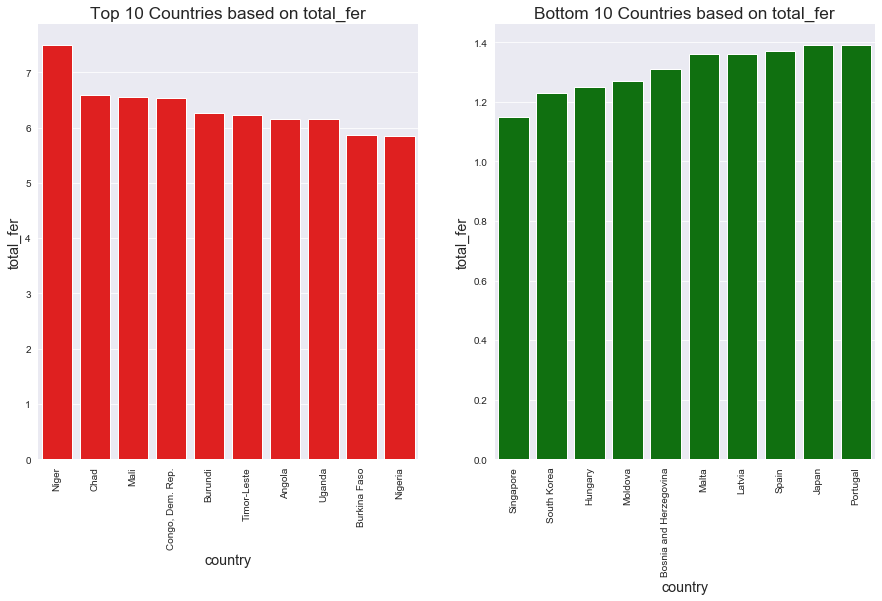

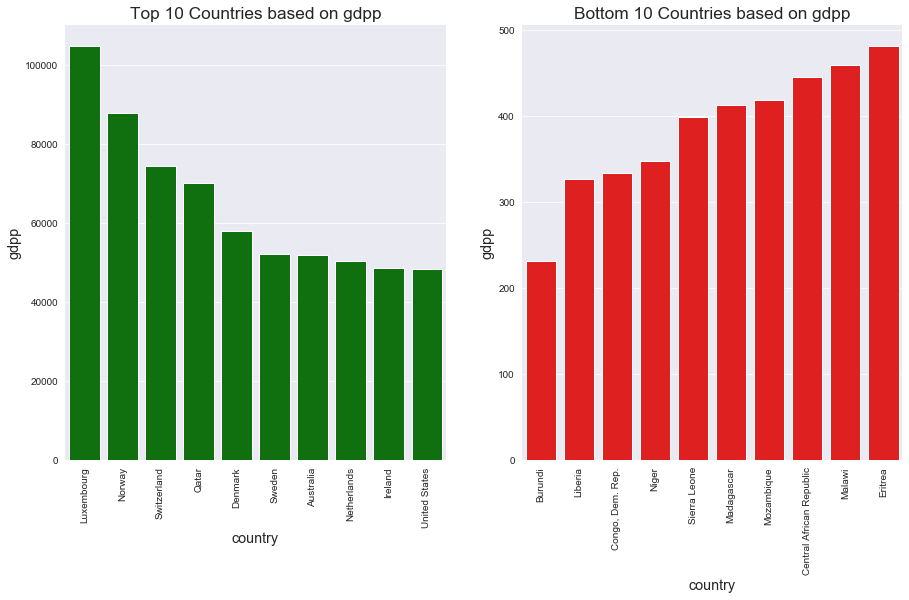

In [16]:
# function for creating barplot between country and other numerical features
def barplot(col, df, isPlot):
    country_top_10 = df.sort_values(by=col, ascending = False).head(10)      # extract top 10 countries based on num col
    country_bottom_10 = df.sort_values(by=col).head(10)             # extract bottom 10 countries based on numerical col
    color1 = 'green'    # green color for countries depicts good condition of countries
    color2 = 'red'      # red color for countries depicts poor condition of countries
    temp_list = list(country_bottom_10['country'])
    if(col == 'total_fer' or col == 'child_mort'):  
        color1 = 'red'
        color2 = 'green'
        temp_list = list(country_top_10['country'])
      
    if isPlot:
        
        for country in temp_list:
            countries_may_need_aid_list.append(country)  # create a list of all the countries in poor condition based on 
                                                     # respective numerical columns
        plt.figure(figsize=(15,8))
        plt.subplot(121)
        plt.title('Top 10 Countries based on ' + col, fontsize='xx-large')
        plt.xlabel('Country', fontsize='x-large')
        plt.ylabel(col, fontsize='x-large')
        sns.barplot(y=col, x='country', data=country_top_10, color=color1)
        plt.xticks(rotation=90)
        sns.despine(left=True, bottom=True)

        plt.subplot(122)
        plt.title('Bottom 10 Countries based on '+ col, fontsize='xx-large')
        plt.xlabel('Country', fontsize='x-large')
        plt.ylabel(col, fontsize='x-large')
        sns.barplot(y=col, x='country', data=country_bottom_10, color=color2)
        plt.xticks(rotation=90)
        sns.despine(left=True, bottom=True)

        plt.show()
        
    else:
        for country in temp_list: 
            countries_may_need_aid_treated_list.append(country) # for later use; might change after outlier treatment

countries_may_need_aid_list = []
for col in num_cols:
    barplot(col,country_df,True)   

# create data frame to store the potential countries with the occurrences w.r.t to numerical columns    
country_potential_df = pd.DataFrame(pd.Series(countries_may_need_aid_list).value_counts(), columns=['Occurrence'])

In [17]:
# display the top 10 potential countries that MIGHT need aid based on the above visualization
country_potential_df.sort_values(by='Occurrence', ascending=False).head(10)

,Occurrence
Central African Republic,7
Sierra Leone,6
"Congo, Dem. Rep.",6
Burundi,6
Niger,6
Mozambique,4
Eritrea,4
Malawi,4
Myanmar,3
Liberia,3


### Inferences on potential countries that might be in direst need of aid:
Table depicts the resons why these countries might need some aid

|Country|child_mort|exports|health|imports|income|inflation|life_expec|total_fer|gdpp|
|--|--|--|--|--|--|--|--|--|--|
|**Central African Republic**|High|Low|Low|Low|Low|-|Low|-|Low|
|**Niger**|High|Low|Low|-|Low|-|-|High|Low|   
|**Sierra Leone**|High|Low|-|Low|Low|-|Low|-|Low|   
|**Congo, Dem. Rep.**|High|-|Low|Low|Low|-|-|High|Low|   
|**Burundi**|-|Low|Low|Low|Low|-|-|High|Low|   
|**Eritrea**|-|Low|Low|Low|-|-|-|-|Low|   
|**Malawi**|-|-|-|Low|Low|-|Low|-|Low|   
|**Mozambique**|-|-|Low|-|Low|-|Low|-|Low|   
|**Myanmar**|-|Low|Low|Low|-|-|-|-|-|   
|**Liberia**|-|Low|-|-|Low|-|-|-|Low|   

### Outlier treatment

In [18]:
# create a separate data frame to store the data after treating the outliers
country_df_treated = country_df.copy()
country_df_treated.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [19]:
# remove outliers 
for col in num_cols:
    Q1 = country_df_treated[col].quantile(0.01)
    Q3 = country_df_treated[col].quantile(0.99)
    index = country_df_treated[(country_df_treated[col] > Q3) | (country_df_treated[col] < Q1)].index
    print(index)
    country_df_treated.drop(index, inplace=True)

Int64Index([66, 68, 132], dtype='int64')
Int64Index([26, 91, 107, 133], dtype='int64')
Int64Index([50, 93, 145, 159], dtype='int64')
Int64Index([15, 31, 73, 94], dtype='int64')
Int64Index([23, 37, 88, 123], dtype='int64')
Int64Index([77, 113, 131, 163], dtype='int64')
Int64Index([7, 87, 139, 166], dtype='int64')
Int64Index([32, 67, 112, 138], dtype='int64')
Int64Index([44, 106, 114, 150], dtype='int64')


In [20]:
# check shape of the data frame where outliers have been treated
country_df_treated.shape

(132, 10)

### There are 132 countries left after outlier treatment

In [21]:
# create the list of potential countries that might need aid AFTER outlier treatment
countries_may_need_aid_treated_list = []
for col in num_cols:
    barplot(col,country_df_treated, False)   

# create data frame to store the potential countries with the occurrences w.r.t to numerical columns    
country_potential_treated_df = pd.DataFrame(pd.Series(countries_may_need_aid_treated_list).value_counts(), columns=['Occurrence'])

# check potential countries after outlier treatment
country_potential_treated_df.sort_values(by='Occurrence', ascending=False).head(10)

,Occurrence
Burkina Faso,8
Afghanistan,7
Uganda,6
Guinea,6
Guinea-Bissau,6
Gambia,5
Nepal,4
Mali,4
Rwanda,4
Comoros,3


The list extracted **after outlier treatment** is **completely different** from the one extracted **before outlier treatment**. Let's visualize them and see.

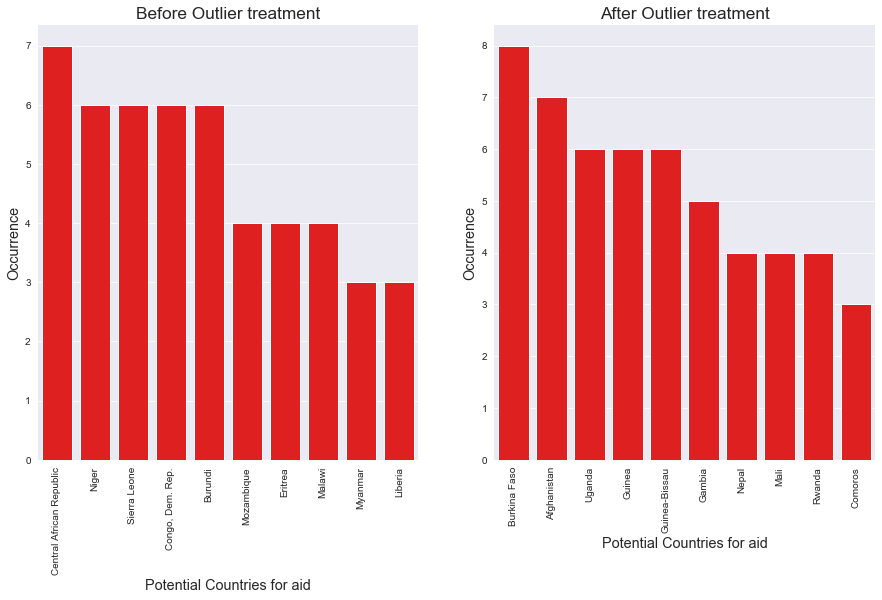

In [22]:
# plot the top 10 potential countries that might need aid based on EDA for comparison:
# 1. Before Outlier treatment
# 2. After Outlier treatment

country_potential_plot_df = country_potential_df.head(10)
country_potential_treated_plot_df = country_potential_treated_df.head(10)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('Before Outlier treatment', fontsize='xx-large')
plt.xlabel('Potential Countries for aid', fontsize='x-large')
plt.ylabel(col, fontsize='x-large')
sns.barplot(y='Occurrence', x=country_potential_plot_df.index, data=country_potential_plot_df, color='red')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)

plt.subplot(122)
plt.title('After Outlier treatment', fontsize='xx-large')
plt.xlabel('Potential Countries for aid', fontsize='x-large')
plt.ylabel(col, fontsize='x-large')
sns.barplot(y='Occurrence', x=country_potential_treated_plot_df.index, data=country_potential_treated_plot_df, color='red')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)

Creating clusters with and without outlier treatment may provide very different results, yet let's create clusters based on these two factors and see.

## 3. Prepare data

In [25]:
# import relevant packages for preparing the data
import sklearn
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [26]:
# scale the numerical features of both the data frames, i.e, 
# 1. One with the outliers
# 2. One without the outliers

# instantiate the scaler object for StandardScaler
scaler = StandardScaler()

# fit_transform 
country_num_ser_scaled = scaler.fit_transform(country_df[num_cols])
country_treated_num_ser_scaled = scaler.fit_transform(country_df_treated[num_cols])

In [27]:
# create scaled data frames from the series obtained after scaling features
country_num_df_scaled = pd.DataFrame(country_num_ser_scaled)
country_num_df_scaled.columns = num_cols
country_num_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [30]:
country_treated_num_df_scaled = pd.DataFrame(country_treated_num_ser_scaled)
country_treated_num_df_scaled.columns = num_cols
country_treated_num_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.770345,-0.675021,-0.596723,-0.705881,-0.963969,0.300087,-2.150109,2.210708,-0.761090
1,-0.526104,-0.513076,-0.413933,-0.414044,-0.347108,-0.405543,0.717423,-0.867228,-0.472796
2,-0.192245,-0.428761,-0.480191,-0.512579,-0.126906,1.249481,0.745956,0.048033,-0.442638
3,2.668956,-0.356466,-0.549251,-0.493464,-0.645900,2.147556,-1.593722,2.461667,-0.518441
4,-0.722675,0.141572,-0.035564,0.458067,0.332774,-0.840326,0.788755,-0.512934,0.188233


### Perfrom PCA
1. On Scaled data set with outliers


2. On Scaled data set without outliers 

In [31]:
# instantiate PCA object with random state = 42
pca = PCA(svd_solver='randomized',random_state=42)
pca_treated = PCA(svd_solver='randomized',random_state=42)

# fit the data frame to pca object
pca.fit(country_num_df_scaled)
pca_treated.fit(country_treated_num_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [32]:
# check componenets 
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [33]:
# check components for pca with treated data set
pca_treated.components_

array([[-0.30534065,  0.36367461,  0.35841283,  0.37352576,  0.37007426,
        -0.15796365,  0.33504089, -0.28759247,  0.38685568],
       [ 0.49727615,  0.32029613,  0.22275828,  0.25961241,  0.18018024,
         0.20873922, -0.35595184,  0.52098036,  0.24279155],
       [-0.17748273,  0.0541234 , -0.15645443, -0.05559207,  0.21814366,
         0.92679968,  0.13437794, -0.11339854, -0.02326196],
       [-0.02688746,  0.46091968, -0.63426807,  0.36140244,  0.14003723,
        -0.14283224, -0.27294308, -0.19626102, -0.31763913],
       [-0.06932324, -0.04948549,  0.35772261,  0.10277281, -0.28111726,
         0.15260167, -0.66543119, -0.55298043,  0.05759817],
       [-0.02307125,  0.18297036,  0.13794651,  0.47697069, -0.70981472,
         0.16473206,  0.34309807,  0.13389698, -0.22987174],
       [-0.78739825, -0.00661845,  0.01009304,  0.03124185, -0.03113625,
        -0.0277048 , -0.32810069,  0.51807962,  0.03299543],
       [ 0.04197433, -0.62065215, -0.35151918,  0.55199261,  0

In [34]:
# check the variance explained by principal components
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [35]:
# check the variance explained by the pricipal componenets based out of treated data set
pca_treated.explained_variance_ratio_

array([0.63880069, 0.16659298, 0.1001796 , 0.03658733, 0.02264233,
       0.02132983, 0.01137607, 0.00146684, 0.00102432])

#### Make the scree plots for both

In [36]:
# calculate cumulative variance for each pca
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu_treated = np.cumsum(pca_treated.explained_variance_ratio_)

print('Cumulative Variance for pca with outlier data set: ')
print(var_cumu)
print('\nCumulative Variance for pca without outlier data set: ')
print(var_cumu_treated)

Cumulative Variance for pca with outlier data set: 
[0.58937298 0.77382467 0.87293939 0.93366217 0.96395389 0.98855216
 0.9979496  0.99950602 1.        ]

Cumulative Variance for pca without outlier data set: 
[0.63880069 0.80539367 0.90557328 0.9421606  0.96480294 0.98613276
 0.99750883 0.99897568 1.        ]


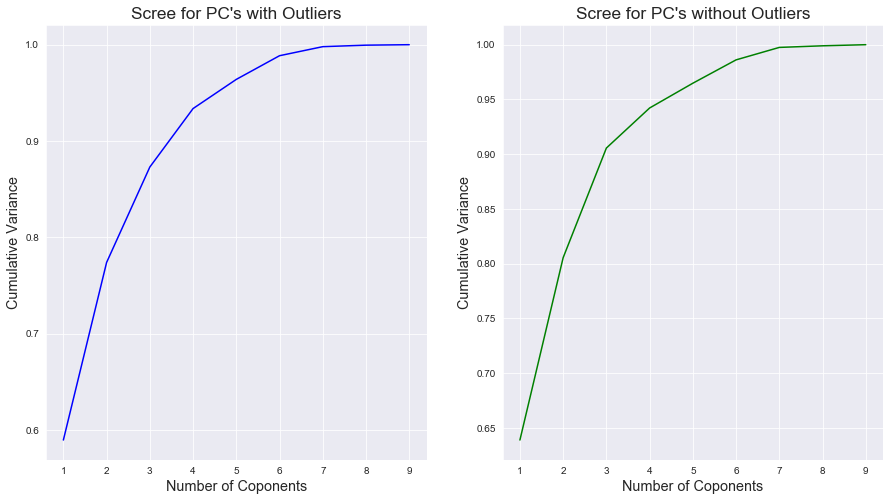

In [37]:
# plot scree
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('Scree for PC\'s with Outliers', fontsize='xx-large')
plt.xlabel('Number of Coponents', fontsize='x-large')
plt.ylabel('Cumulative Variance', fontsize='x-large')
plt.plot(range(1, len(var_cumu)+1), var_cumu, 'b-')

plt.subplot(122)
plt.title('Scree for PC\'s without Outliers', fontsize='xx-large')
plt.xlabel('Number of Coponents', fontsize='x-large')
plt.ylabel('Cumulative Variance', fontsize='x-large')
plt.plot(range(1,len(var_cumu_treated)+1), var_cumu_treated, 'g-')

plt.show()

### Number of PCA's to go about for both.
For both, 5 PC's can be used, since in both the cases they explain around 96% of the total variance in the data. Post 5 components, the slope in both the cases starts leveling off.

### Run PCA with the components chosen above on both data sets

In [38]:
# instantiate objects with  5 components
pca_final = IncrementalPCA(n_components=5)
pca_treated_final = IncrementalPCA(n_components=5)

# fit the data frames to IncrementalPCA objects
country_ser_pca = pca_final.fit_transform(country_num_df_scaled)
country_ser_treated_pca = pca_treated_final.fit_transform(country_treated_num_df_scaled)

In [39]:
# check shapes of both 
print('PCA df with outliers: ',country_ser_pca.shape)
print('PCA df without outliers: ',country_ser_treated_pca.shape)

PCA df with outliers:  (167, 5)
PCA df without outliers:  (132, 5)


In [40]:
# create data frame for both with the PC's obtained
country_df_pca = pd.DataFrame(country_ser_pca, columns=['PC1','PC2','PC3','PC4','PC5'])
country_df_pca.head()                                                        

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [41]:
country_df_treated_pca = pd.DataFrame(country_ser_treated_pca, columns=['PC1','PC2','PC3','PC4','PC5'])
country_df_treated_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.318307,1.968948,-0.671092,0.031863,-0.039685
1,-0.086495,-1.594650,-0.093293,-0.037142,0.064005
2,-0.640110,-0.583244,1.347208,0.291480,0.312881
3,-3.346395,3.018442,0.986307,0.314657,0.079753
4,1.171045,-0.820945,-0.431201,-0.291618,0.293336


## 4. Clustering

### 4.1 Check for cluster tendency using hopkins test

In [42]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
# check hokins measure for both the data frames with 5 PC's
# check for 5 iterations

print('Hopkins test for PCA data with outliers')
for i in range(5):
    print('Iteration no. {0}: '.format((i+1)), round(hopkins(country_df_pca),2))
    
    
print('\nHopkins test for PCA data without outliers')
for i in range(5):
    print('Iteration no. {0}: '.format((i+1)), round(hopkins(country_df_treated_pca),2))    

Hopkins test for PCA data with outliers
Iteration no. 1:  0.94
Iteration no. 2:  0.93
Iteration no. 3:  0.95
Iteration no. 4:  0.88
Iteration no. 5:  0.94

Hopkins test for PCA data without outliers
Iteration no. 1:  0.83
Iteration no. 2:  0.86
Iteration no. 3:  0.76
Iteration no. 4:  0.85
Iteration no. 5:  0.85


#### Data in both the data frames have high tendency to cluster, since the test range is between 0.7 - 0.99

In [44]:
# import relevant packages related to clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 4.2 Determine the number of clusters to be formed using the below methods:
1. Silhouette Score


2. Elbow Curve plot


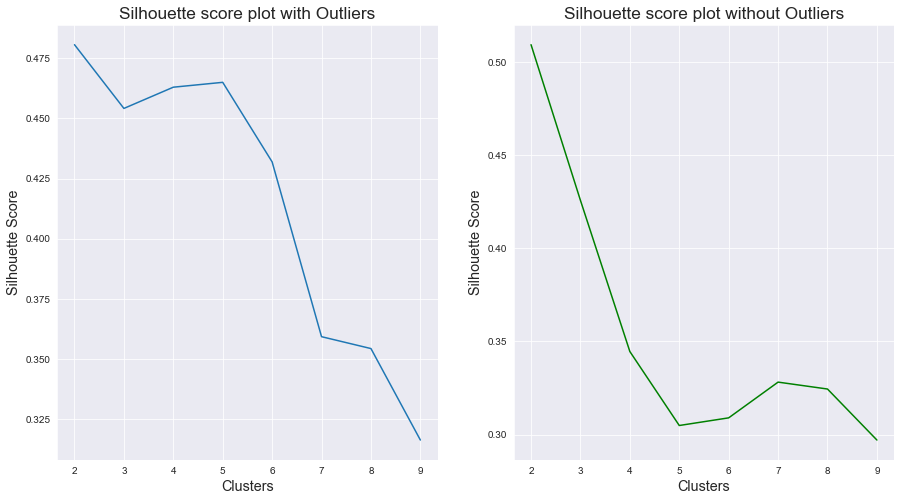

In [45]:
# Silhouette score for both the data frames

# for data frame with outliers
ss_pca = []
for k in range(2,10):
    kmeans_pca = KMeans(n_clusters=k).fit(country_df_pca)
    ss_pca.append([k, silhouette_score(country_df_pca, kmeans_pca.labels_)])

# for data frame without outliers
ss_treated_pca = []
for k in range(2,10):
    kmeans_treated_pca = KMeans(n_clusters=k).fit(country_df_treated_pca)
    ss_treated_pca.append([k,silhouette_score(country_df_treated_pca, kmeans_treated_pca.labels_)])
    
    
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('Silhouette score plot with Outliers', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('Silhouette Score', fontsize='x-large')
plt.plot(pd.DataFrame(ss_pca)[0], pd.DataFrame(ss_pca)[1])

plt.subplot(122)
plt.title('Silhouette score plot without Outliers', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('Silhouette Score', fontsize='x-large')
plt.plot(pd.DataFrame(ss_treated_pca)[0], pd.DataFrame(ss_treated_pca)[1], 'g-')

plt.show()

Based on the silhouette score:
1. For data frame with outliers, number of clusters can be 2, 3, and 4.


2. For data frame without outliers, number of clusters can also be 2,3, and 4, since they have good score.

Let's check Elbow curve method to confirm

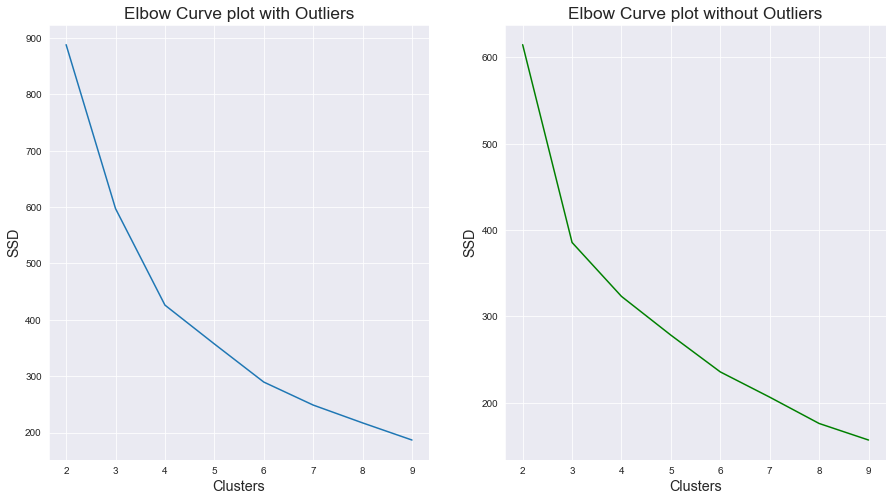

In [46]:
# Elbow Curve for both the data frames

# for data frame with outliers
ssd_pca = []
for k in range(2,10):
    kmeans_pca = KMeans(n_clusters=k).fit(country_df_pca)
    ssd_pca.append([k, kmeans_pca.inertia_])
    
# for data frame without outliers
ssd_treated_pca = []
for k in range(2,10):
    kmeans_treated_pca = KMeans(n_clusters=k).fit(country_df_treated_pca)
    ssd_treated_pca.append([k, kmeans_treated_pca.inertia_])
    
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('Elbow Curve plot with Outliers', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('SSD', fontsize='x-large')
plt.plot(pd.DataFrame(ssd_pca)[0], pd.DataFrame(ssd_pca)[1])

plt.subplot(122)
plt.title('Elbow Curve plot without Outliers', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('SSD', fontsize='x-large')
plt.plot(pd.DataFrame(ssd_treated_pca)[0], pd.DataFrame(ssd_treated_pca)[1], 'g-')

plt.show()    

From Elbow curve also, the potential number of clusters for both the data frames can be 2,3 and 4, but let's go with 3 for the following reasons:
1. Considering 2 will just split the data into half, which will not be very useful.


2. Considering 4 clusters will also not make much sense since the number of features are very less.


3. Choosing 3 would help from the business perspective as 3 clusters could mean poor, average and good performing countries. (A potential cluster labeling.)

### 4.3 KMeans with K = 3

In [47]:
# KMeans for data frame with outliers using K = 3
model_kmeans = KMeans(n_clusters=3, random_state=50)
model_kmeans.fit(country_df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [48]:
# KMeans for data frame without outliers using K = 3
model_treated_kmeans = KMeans(n_clusters=3, random_state=50)
model_treated_kmeans.fit(country_df_treated_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [49]:
# concat country column with PCA data frame with outliers
c = country_df['country']
country_df_pca_kmeans = pd.concat([country_df_pca.reset_index().drop('index', axis=1), 
                               c.reset_index().drop('index', axis=1)],axis=1)

# assign kmeans labels to PCA data frame with outliers
country_df_pca_kmeans['cluster_id'] = model_kmeans.labels_

# check head
country_df_pca_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_id
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda,1


In [50]:
# concat country columns with PCA data frame without outliers
d = country_df_treated['country']
country_df_treated_pca_kmeans = pd.concat([country_df_treated_pca.reset_index().drop('index', axis=1), 
                                       d.reset_index().drop('index', axis=1)],axis=1)

# assign kmeans labels to PCA data frame without outliers
country_df_treated_pca_kmeans['cluster_id'] = pd.Series(model_treated_kmeans.labels_).reset_index().drop('index', axis=1)

# check head
country_df_treated_pca_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_id
0,-3.318307,1.968948,-0.671092,0.031863,-0.039685,Afghanistan,0
1,-0.086495,-1.594650,-0.093293,-0.037142,0.064005,Albania,2
2,-0.640110,-0.583244,1.347208,0.291480,0.312881,Algeria,2
3,-3.346395,3.018442,0.986307,0.314657,0.079753,Angola,0
4,1.171045,-0.820945,-0.431201,-0.291618,0.293336,Antigua and Barbuda,2


### 4.4 Plot the clusters with PCA's

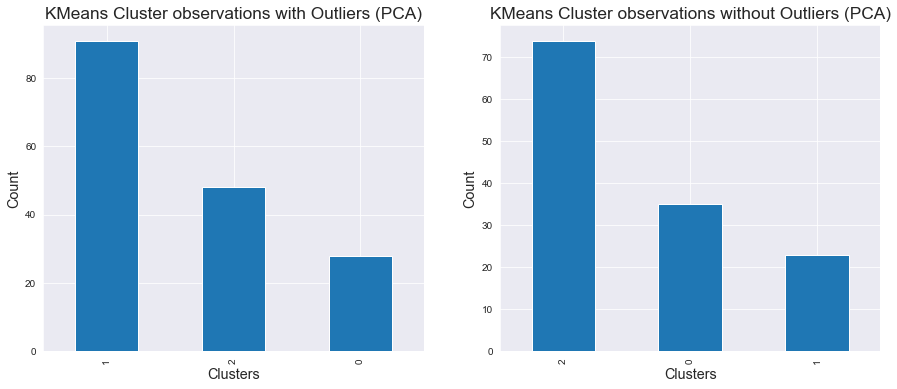

In [51]:
# check the count of observations per cluster
plt.figure(figsize=(15,6))

# plot for data frame with outliers
plt.subplot(121)
plt.title('KMeans Cluster observations with Outliers (PCA)', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
country_df_pca_kmeans['cluster_id'].value_counts().plot(kind='bar')

# plot for data frame without outliers
plt.subplot(122)
plt.title('KMeans Cluster observations without Outliers (PCA)', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
country_df_treated_pca_kmeans['cluster_id'].value_counts().plot(kind='bar')

plt.show()

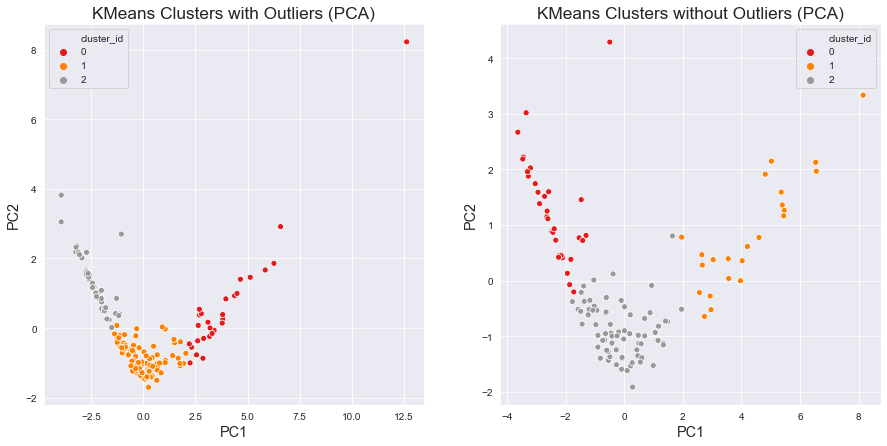

In [52]:
# visualize the clusters formed based on top two PC's, since they provide the most of the variance in the data set

plt.figure(figsize=(15,7))

# create pairplot for data frame with outliers
plt.subplot(121)
plt.title('KMeans Clusters with Outliers (PCA)', fontsize='xx-large')
plt.xlabel('PC1', fontsize='x-large')
plt.ylabel('PC2', fontsize='x-large')
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id', data=country_df_pca_kmeans, palette='Set1')

# create pairplot for data frame without outliers
plt.subplot(122)
plt.title('KMeans Clusters without Outliers (PCA)', fontsize='xx-large')
plt.xlabel('PC1', fontsize='x-large')
plt.ylabel('PC2', fontsize='x-large')
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id', data=country_df_treated_pca_kmeans, palette='Set1')

plt.show()

### 4.5 Cluster Profiling (KMeans)

In [53]:
# assign kmeans labels to original data frame with outliers
country_df_kmeans = pd.concat([country_df.reset_index().drop('index', axis=1), 
                               pd.Series(model_kmeans.labels_).reset_index().drop('index', axis=1)],axis=1)

country_df_kmeans.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 
                             'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']

# check head
country_df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [54]:
# assign kmeans labels to original data frame without outliers
country_df_treated_kmeans = pd.concat([country_df_treated.reset_index().drop('index', axis=1), 
                               pd.Series(model_treated_kmeans.labels_).reset_index().drop('index', axis=1)],axis=1)

country_df_treated_kmeans.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 
                             'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']

# check head
country_df_treated_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


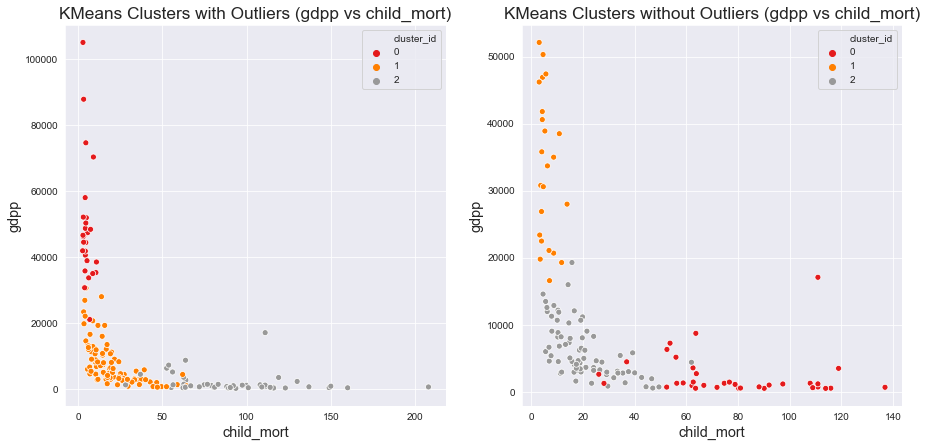

In [55]:
# visualize the clusters formed based on two important features,i.e, child_mort and gdpp

plt.figure(figsize=(15,7))

# create pairplot for data frame with outliers
plt.subplot(121)
plt.title('KMeans Clusters with Outliers (gdpp vs child_mort)', fontsize='xx-large')
plt.xlabel('child_mort', fontsize='x-large')
plt.ylabel('gdpp', fontsize='x-large')
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_id', data=country_df_kmeans, palette='Set1')

# create pairplot for data frame without outliers
plt.subplot(122)
plt.title('KMeans Clusters without Outliers (gdpp vs child_mort)', fontsize='xx-large')
plt.xlabel('child_mort', fontsize='x-large')
plt.ylabel('gdpp', fontsize='x-large')
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_id', data=country_df_treated_kmeans, palette='Set1')

plt.show()

Based on the above clustering for data frame with and without outliers, the clusters can be named as follows:
1. **Developed** Countries


2. **Developing** Countries


3. **Under-developed** Countries.


Aim is to find the under-developed countries

The clusters for data set with outliers depicts the under developed ones to be shown by cluster no. 2, since
- gdpp is very low
- child_mort is very high

In [56]:
# get the top 10 countries that can be considered to be poor based on gdpp (data set with outliers)
country_df_kmeans.loc[(country_df_kmeans['cluster_id'] == 2)].sort_values(by='gdpp').head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,2


In [57]:
# get the top 10 countries that can be considered to be poor based on gdpp (data set without outliers)
country_df_treated_kmeans.loc[(country_df_treated_kmeans['cluster_id'] == 0)].sort_values(by='gdpp').head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
55,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.97,55.6,5.05,547,0
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,0
47,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,0
101,Rwanda,63.6,67.560,59.1150,168.900,1350,2.61,64.6,4.51,563,0
22,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,0
123,Uganda,81.0,101.745,53.6095,170.170,1540,10.60,56.8,6.15,595,0
54,Guinea,109.0,196.344,31.9464,279.936,1190,16.10,58.0,5.34,648,0
116,Tanzania,71.9,131.274,42.1902,204.282,2090,9.25,59.3,5.43,702,0
78,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0
115,Tajikistan,52.4,109.962,44.1324,432.468,2110,12.50,69.6,3.51,738,0


#### As suspected earlier during EDA, when outliers were treated, a lot of extremely under-developed countries were trimmed off. Those countries could have potentially been the ones with direst need of aid. Now, after treatment since they are not in the picture, let's consider the original data frame with the outliers, and analyse further ONLY this one and not consider the data frame where the outliers were treated. The business aspect also doesn't suit the requirement.

In [58]:
# group the data frame with outliers by cluster_id and check the mean of 
# 1. child_mort
# 2. income
# 3. gdpp
country_df_kmeans[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,5.046429,50178.571429,48114.285714
1,20.357143,13968.021978,7979.912088
2,91.610417,3897.354167,1909.208333


**Cluster no 2** has the following:
1. Lowest gdpp


2. lowest income


3. highest child_mort

This cluster can be considered to be under-developed countries

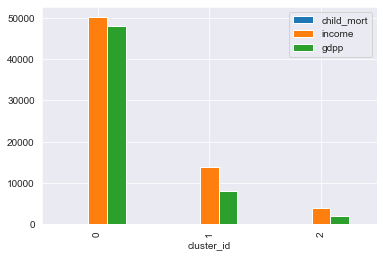

In [59]:
# plot bar graph to visualize the clusters based on
# 1. child_mort
# 2. income
# 3. gdpp
country_df_kmeans[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
plt.show()

From the above graph it's very clear that there are 3 different clusters based on 'child_mort' , 'income', and 'gdpp', where cluster no 2 requires aid.

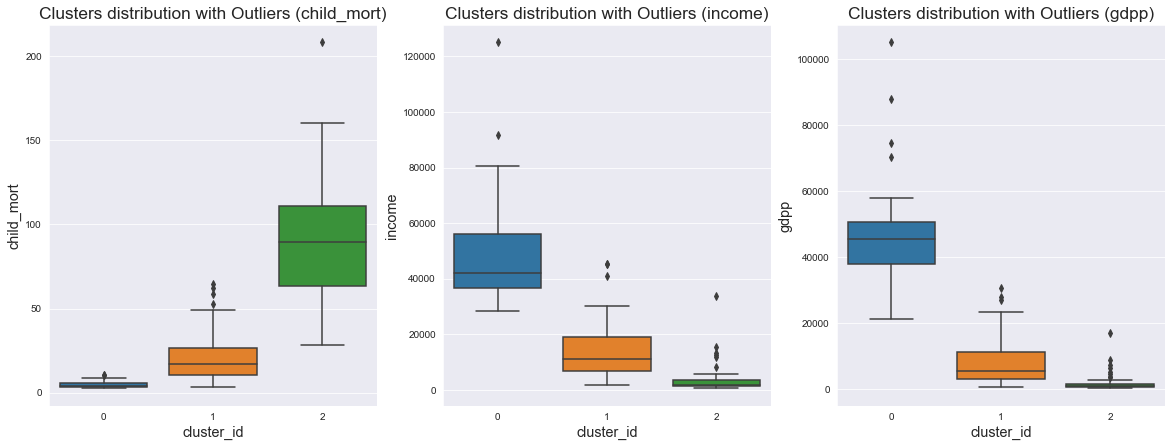

In [60]:
# boxplots to check with 3 important features, namely, child_mort, income, and gdpp
plt.figure(figsize = (20,7))
var = ['child_mort', 'income', 'gdpp']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    plt.title('Clusters distribution with Outliers ' + '(' + i[1] + ')', fontsize='xx-large')
    plt.xlabel('cluster_id', fontsize='x-large')
    plt.ylabel(i[1], fontsize='x-large')
    sns.boxplot(x= 'cluster_id', y = i[1], data = country_df_kmeans)

#### Inferences

1. **Cluster 0 (Developed)**: High gdpp, High income, Low child_mort


2. **Cluster 1 (Developing)**: Medium gdpp, Medium income, Medium child_mort



3. **Cluster 2 (Under-developed)**: Low gdpp, Low income, High child_mort

### 4.6 Hierarchical Clustering
1. Single Linkage


2. Complete Linkage

In [61]:
# import relevant packages for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

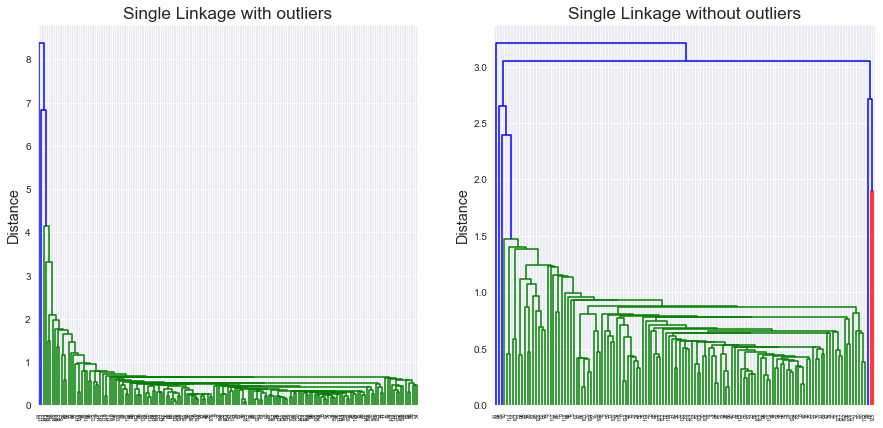

In [62]:
# single linkage

# crete merging using the data frame with outliers and metric as 'euclidean'
plt.figure(figsize=(15,7))
mergings_pca = linkage(country_df_pca, method='single', metric='euclidean')

# create mergins using the data frame without outliers
mergings_treated_pca = linkage(country_df_treated_pca, method='single', metric='euclidean')

plt.subplot(121)
plt.title('Single Linkage with outliers', fontsize='xx-large')
plt.ylabel('Distance', fontsize='x-large')
dendrogram(mergings_pca)

plt.subplot(122)
plt.title('Single Linkage without outliers', fontsize='xx-large')
plt.ylabel('Distance', fontsize='x-large')
dendrogram(mergings_treated_pca)

plt.show()

As it can be seen clearly, **single linkage doesn't produce a good enough result** for us to analyse the clusters. Hence, let's go ahead and utilise the complete linkage method and then analyse the clusters once again.

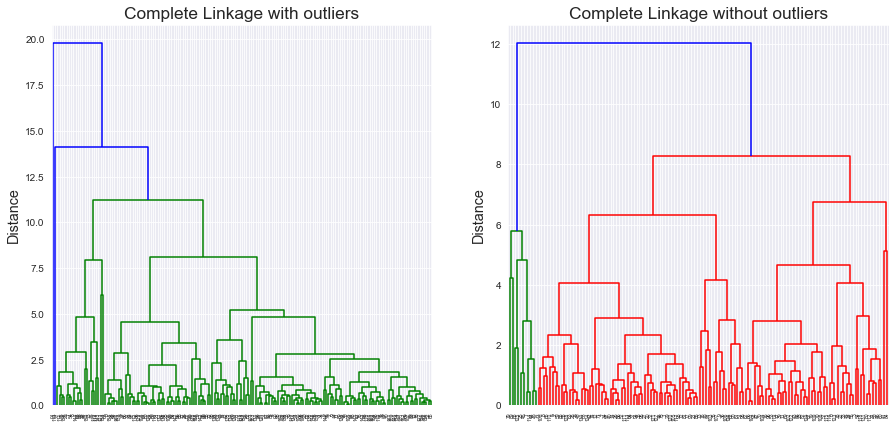

In [63]:
# comple linkage

# crete merging using the data frame with outliers and metric as 'euclidean'
plt.figure(figsize=(15,7))
mergings_pca = linkage(country_df_pca, method='complete', metric='euclidean')

# create mergins using the data frame without outliers
mergings_treated_pca = linkage(country_df_treated_pca, method='complete', metric='euclidean')

plt.subplot(121)
plt.title('Complete Linkage with outliers', fontsize='xx-large')
plt.ylabel('Distance', fontsize='x-large')
dendrogram(mergings_pca)

plt.subplot(122)
plt.title('Complete Linkage without outliers', fontsize='xx-large')
plt.ylabel('Distance', fontsize='x-large')
dendrogram(mergings_treated_pca)

plt.show()

In [64]:
# going ahead with 3 clusters as per business sense
# calculate cluster labels for both the cases using cut_tree method

# for df with outliers
hierarchical_labels_pca = cut_tree(mergings_pca, n_clusters=3).reshape(-1, )
hierarchical_labels_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
# for df without outliers
hierarchical_labels_treated_pca = cut_tree(mergings_treated_pca, n_clusters=3).reshape(-1,)
hierarchical_labels_treated_pca

array([0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0])

In [66]:
# concat country column with PCA data frame with outliers
c = country_df['country']
country_df_pca_hierarchical = pd.concat([country_df_pca.reset_index().drop('index', axis=1), 
                               c.reset_index().drop('index', axis=1)],axis=1)

# assign kmeans labels to PCA data frame with outliers
country_df_pca_hierarchical['cluster_id'] = hierarchical_labels_pca

# check head
country_df_pca_hierarchical.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_id
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda,0


In [67]:
# concat country columns with PCA data frame without outliers
d = country_df_treated['country']
country_df_treated_pca_hierarchical = pd.concat([country_df_treated_pca.reset_index().drop('index', axis=1), 
                                       d.reset_index().drop('index', axis=1)],axis=1)

# assign kmeans labels to PCA data frame without outliers
country_df_treated_pca_hierarchical['cluster_id'] = pd.Series(hierarchical_labels_treated_pca).reset_index().drop('index', axis=1)

# check head
country_df_treated_pca_hierarchical.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_id
0,-3.318307,1.968948,-0.671092,0.031863,-0.039685,Afghanistan,0
1,-0.086495,-1.594650,-0.093293,-0.037142,0.064005,Albania,1
2,-0.640110,-0.583244,1.347208,0.291480,0.312881,Algeria,1
3,-3.346395,3.018442,0.986307,0.314657,0.079753,Angola,0
4,1.171045,-0.820945,-0.431201,-0.291618,0.293336,Antigua and Barbuda,1


### 4.4 Plot the hierarchical clusters with PCA's

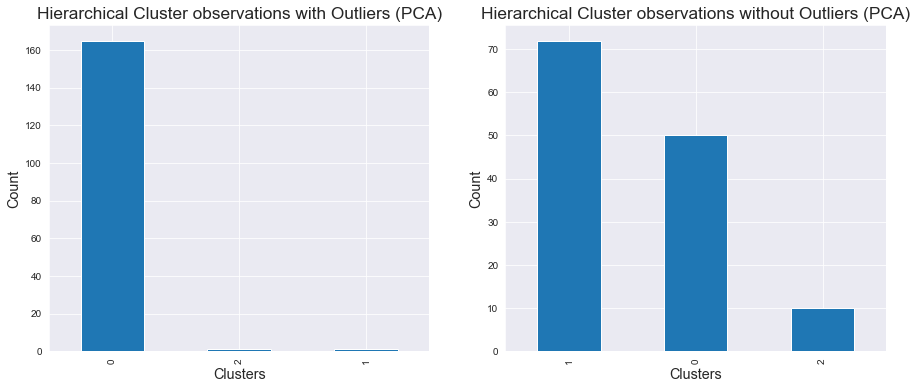

In [68]:
# check the count of observations per cluster
plt.figure(figsize=(15,6))

# plot for data frame with outliers
plt.subplot(121)
plt.title('Hierarchical Cluster observations with Outliers (PCA)', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
country_df_pca_hierarchical['cluster_id'].value_counts().plot(kind='bar')

# plot for data frame without outliers
plt.subplot(122)
plt.title('Hierarchical Cluster observations without Outliers (PCA)', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
country_df_treated_pca_hierarchical['cluster_id'].value_counts().plot(kind='bar')

plt.show()

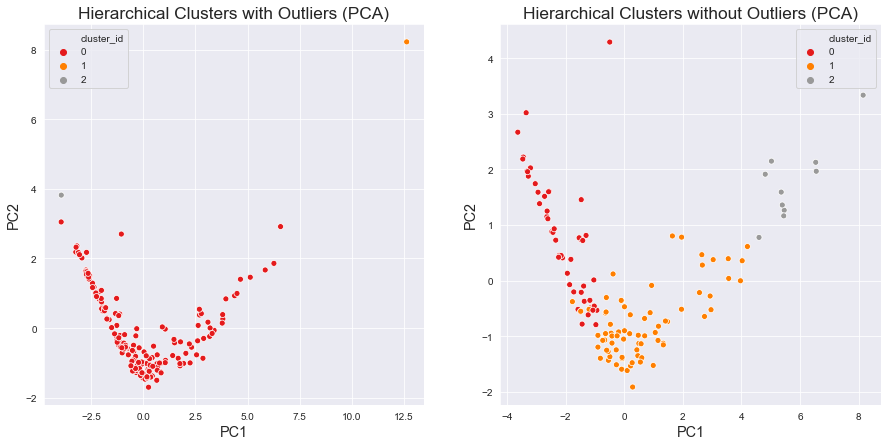

In [69]:
# visualize the clusters formed based on top two PC's, since they provide the most of the variance in the data set

plt.figure(figsize=(15,7))

# create pairplot for data frame with outliers
plt.subplot(121)
plt.title('Hierarchical Clusters with Outliers (PCA)', fontsize='xx-large')
plt.xlabel('PC1', fontsize='x-large')
plt.ylabel('PC2', fontsize='x-large')
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id', data=country_df_pca_hierarchical, palette='Set1')

# create pairplot for data frame without outliers
plt.subplot(122)
plt.title('Hierarchical Clusters without Outliers (PCA)', fontsize='xx-large')
plt.xlabel('PC1', fontsize='x-large')
plt.ylabel('PC2', fontsize='x-large')
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id', data=country_df_treated_pca_hierarchical, palette='Set1')

plt.show()

### 4.7 Cluster profiling (Hierarchical-Complete) 

In [70]:
# assign hierarchical labels to the original data frame with outliers
country_df_hierarchical = pd.concat([country_df.reset_index().drop('index', axis=1),
                                    pd.Series(hierarchical_labels_pca).reset_index().drop('index', axis=1)],axis=1)

country_df_hierarchical.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 
                             'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']

# check head
country_df_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [71]:
# assign hierarchical labels to the original data frame without outliers
country_df_treated_hierarchical = pd.concat([country_df_treated.reset_index().drop('index', axis=1),
                                    pd.Series(hierarchical_labels_treated_pca).reset_index().drop('index', axis=1)],axis=1)

country_df_treated_hierarchical.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 
                             'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']

# check head
country_df_treated_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [72]:
# group the data frame with outliers by cluster_id and check the mean of 
# 1. child_mort
# 2. income
# 3. gdpp
country_df_hierarchical[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,37.929091,16765.533333,12470.812121
1,2.800000,91700.000000,105000.000000
2,130.000000,5150.000000,2330.000000


**Cluster no 2** has the following:
1. Lowest gdpp


2. lowest income


3. highest child_mort

This cluster can be considered to be under-developed countries, **but lets verify by plotting boxplots, scatter plots and checking the distribution of countries into different clusters**

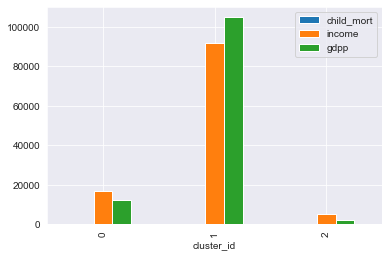

In [73]:
# plot bar graph to visualize the clusters based on
# 1. child_mort
# 2. income
# 3. gdpp
country_df_hierarchical[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
plt.show()

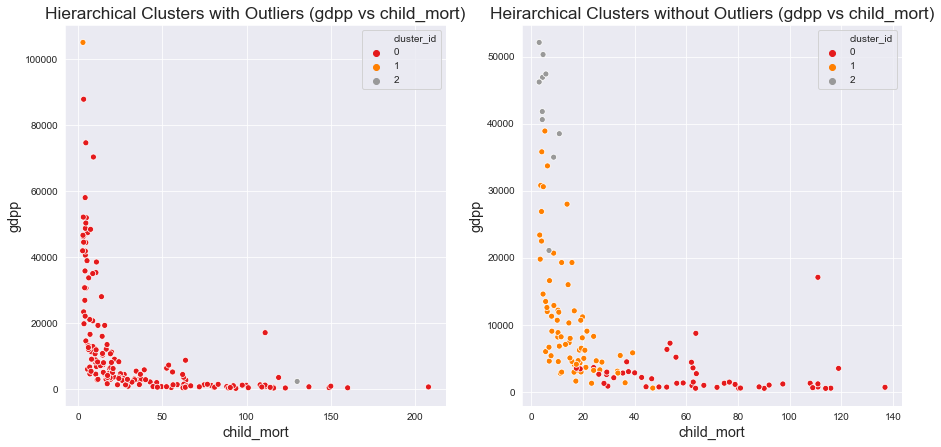

In [74]:
# visualize the clusters formed based on two important features,i.e, child_mort and gdpp

plt.figure(figsize=(15,7))

# create pairplot for data frame with outliers
plt.subplot(121)
plt.title('Hierarchical Clusters with Outliers (gdpp vs child_mort)', fontsize='xx-large')
plt.xlabel('child_mort', fontsize='x-large')
plt.ylabel('gdpp', fontsize='x-large')
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_id', data=country_df_hierarchical, palette='Set1')

# create pairplot for data frame without outliers
plt.subplot(122)
plt.title('Heirarchical Clusters without Outliers (gdpp vs child_mort)', fontsize='xx-large')
plt.xlabel('child_mort', fontsize='x-large')
plt.ylabel('gdpp', fontsize='x-large')
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_id', data=country_df_treated_hierarchical, palette='Set1')

plt.show()

#### The clustering doesn't look good for the one with outliers.

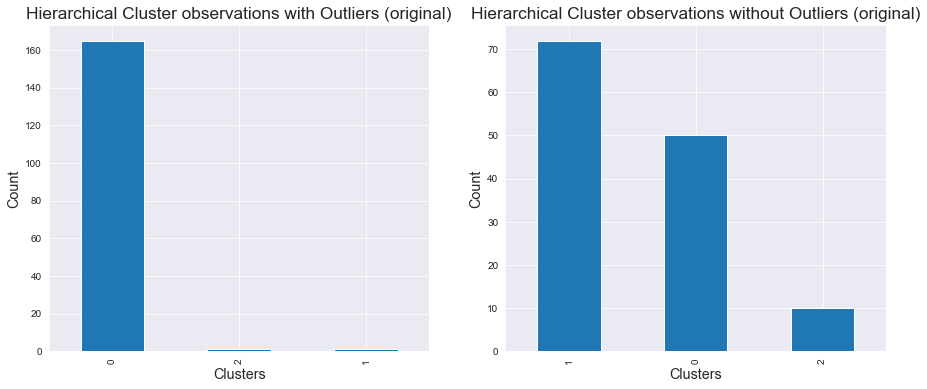

In [75]:
# check the count of observations per cluster for hierarchical complete linkage
plt.figure(figsize=(15,6))

# plot for data frame with outliers
plt.subplot(121)
plt.title('Hierarchical Cluster observations with Outliers (original)', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
country_df_hierarchical['cluster_id'].value_counts().plot(kind='bar')

# plot for data frame without outliers
plt.subplot(122)
plt.title('Hierarchical Cluster observations without Outliers (original)', fontsize='xx-large')
plt.xlabel('Clusters', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
country_df_treated_hierarchical['cluster_id'].value_counts().plot(kind='bar')

plt.show()

#### It can be observed (df with outliers):
1. Clusters created using hierarchical clustering (complete) doesn't cluster the countries in good proportion


2. There is a lot of imbalance seen here.


3. Almost all the countries are grouped into cluster number 0.

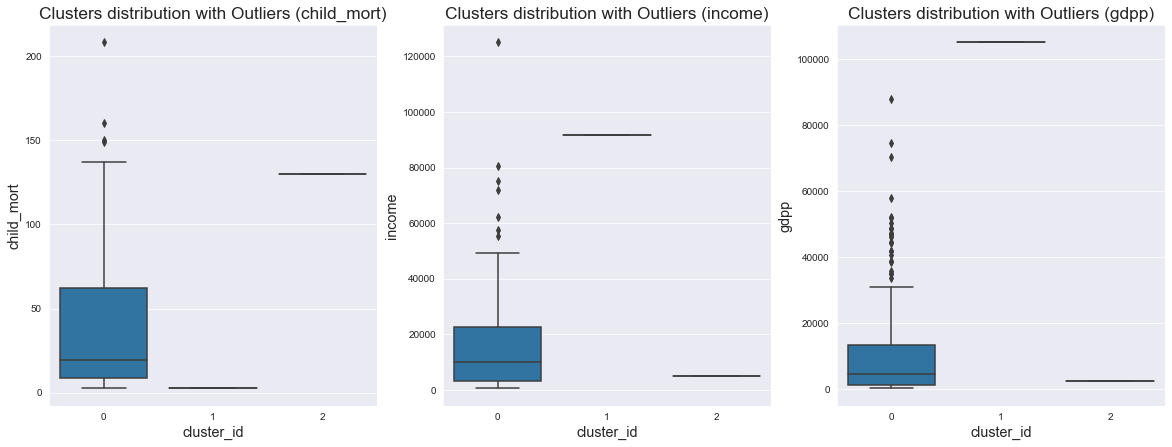

In [76]:
# boxplots to check with 3 important features, namely, child_mort, income, and gdpp
plt.figure(figsize = (20,7))
var = ['child_mort', 'income', 'gdpp']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    plt.title('Clusters distribution with Outliers ' + '(' + i[1] + ')', fontsize='xx-large')
    plt.xlabel('cluster_id', fontsize='x-large')
    plt.ylabel(i[1], fontsize='x-large')
    sns.boxplot(x= 'cluster_id', y = i[1], data = country_df_hierarchical)

#### Similary, the box plot also doesn't properly represent clusters when used hierarchical clustering (complete method)

## 5 Recommendations

1. Clearly **KMeans provides better results** when compared to Hierarchical (Complete Linkage) clustering. 


2. Removing outliers trimmed off few low performing countries, which were potentially the ones to be receiving aid the most. 

Extract the **list of under-developed countries** from **KMeans** and **Hierarchical (Complete Linkage)** clustering process for both **with** and **without outliers**.

In [77]:
# Countries from KMEANS with outliers
country_df_kmeans.loc[(country_df_kmeans['cluster_id'] == 2)].shape

(48, 11)

In [78]:
# Countries from KMEANS without outliers
country_df_treated_kmeans.loc[(country_df_kmeans['cluster_id'] == 0)].shape

(21, 11)

In [79]:
# Countries from HIERARCHICAL with outliers
country_df_hierarchical.loc[(country_df_hierarchical['cluster_id'] == 2)].shape

(1, 11)

In [80]:
# Countries from HIERARCHICAL without outliers
country_df_treated_hierarchical.loc[(country_df_hierarchical['cluster_id'] == 0)].shape

(130, 11)

### As it can be observed:
1. Hierarchical clustering provided with very extreme number of countries for both with and without outliers, let's not consider them for recommendations


2. KMeans clustering has interesting findings:
    - With outliers: 48 countries
    - Without outliers: 21 countries.
    
    Now as mentioned before, there were few potential countries that could require aid were removed while treating outliers, and the count displays the same. There are less than half countries remaining after treating outliers.<br> 
    Let's still check the top 10 countries from both the lists and see if there is any intersection between them (common countries)

In [81]:
# get common countries based on gdpp (sorted by Lowest)
country_top_10_kmeans_gdpp = country_df_kmeans.loc[(country_df_kmeans['cluster_id'] == 2)].sort_values('gdpp').head(10).country
country_top_10_kmeans_gdpp_set = set(country_top_10_kmeans_gdpp.tolist())

country_top_10_treated_kmeans_gdpp = country_df_treated_kmeans.loc[(country_df_treated_kmeans['cluster_id'] == 0)].sort_values('gdpp').head(10).country
country_top_10_treated_kmeans_gdpp_set = set(country_top_10_treated_kmeans_gdpp.tolist())

# print common countries from Kmeans with and without outliers
print(country_top_10_kmeans_gdpp_set.intersection(country_top_10_treated_kmeans_gdpp_set))

set()


In [82]:
# get common countries based on income (sorted by Lowest)
country_top_10_kmeans_income = country_df_kmeans.loc[(country_df_kmeans['cluster_id'] == 2)].sort_values('income').head(10).country
country_top_10_kmeans_income_set = set(country_top_10_kmeans_income.tolist())

country_top_10_treated_kmeans_income = country_df_treated_kmeans.loc[(country_df_treated_kmeans['cluster_id'] == 0)].sort_values('income').head(10).country
country_top_10_treated_kmeans_income_set = set(country_top_10_treated_kmeans_income.tolist())

# print common countries from Kmeans with and without outliers
print(country_top_10_kmeans_income_set.intersection(country_top_10_treated_kmeans_income_set))

{'Guinea'}


In [83]:
# get common countries based on child_mort (sorted by Highest)
country_top_10_kmeans_child_mort = country_df_kmeans.loc[(country_df_kmeans['cluster_id'] == 2)].sort_values('child_mort', ascending=False).head(10).country
country_top_10_kmeans_child_mort_set = set(country_top_10_kmeans_child_mort.tolist())

country_top_10_treated_kmeans_child_mort = country_df_treated_kmeans.loc[(country_df_treated_kmeans['cluster_id'] == 0)].sort_values('child_mort', ascending=False).head(10).country
country_top_10_treated_kmeans_child_mort_set = set(country_top_10_treated_kmeans_child_mort.tolist())

# print common countries from Kmeans with and without outliers
print(country_top_10_kmeans_child_mort_set.intersection(country_top_10_treated_kmeans_child_mort_set))

{'Angola', 'Burkina Faso', 'Mali'}


### Inference from above
1. Based on **gdpp**: No common countries


2. Based on **income**: 1 common country
    1. Guinea
    
    
3. Based on **child_mort**: 3 common countries
    1. Burkina Faso
    2. Mali
    3. Angola

In [84]:
# Let's extract top 10 countries based on all the 3 factors:
# 1. gdpp
# 2. income
# 3. child_mort

# get all the top 10 countries based on respective features, viz-a-viz gdpp, income, and child_mort
country_total_list = country_top_10_kmeans_gdpp.append(country_top_10_kmeans_income).append(country_top_10_kmeans_child_mort)
print(len(country_total_list))

country_final_list = list(country_total_list.value_counts().sort_values(ascending=False).index)
print(country_final_list)

30
['Niger', 'Sierra Leone', 'Congo, Dem. Rep.', 'Central African Republic', 'Liberia', 'Mozambique', 'Malawi', 'Burundi', 'Burkina Faso', 'Nigeria', 'Angola', 'Mali', 'Haiti', 'Togo', 'Guinea', 'Madagascar', 'Chad', 'Eritrea']


In [85]:
# create data frame for the final list of countries
country_df_final_list = pd.DataFrame(country_total_list.value_counts()).reset_index()
country_df_final_list.columns = ['country','ranking']
country_df_final_list.head()

,country,ranking
0,Niger,3
1,Sierra Leone,3
2,"Congo, Dem. Rep.",3
3,Central African Republic,3
4,Liberia,2


NOTE: `Here, higher the number assigned to ranking, higher the need for aid`

In [86]:
# merge original data frame to this data frame
country_df_final_list = pd.merge(country_df_final_list, country_df, on='country', how='inner')
country_df_final_list

,country,ranking,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Niger,3,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
1,Sierra Leone,3,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
2,"Congo, Dem. Rep.",3,116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
3,Central African Republic,3,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
4,Liberia,2,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
5,Mozambique,2,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
6,Malawi,2,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
7,Burundi,2,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
8,Eritrea,1,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482
9,Angola,1,119.0,2199.1900,100.6050,1514.370,5900,22.40,60.1,6.16,3530


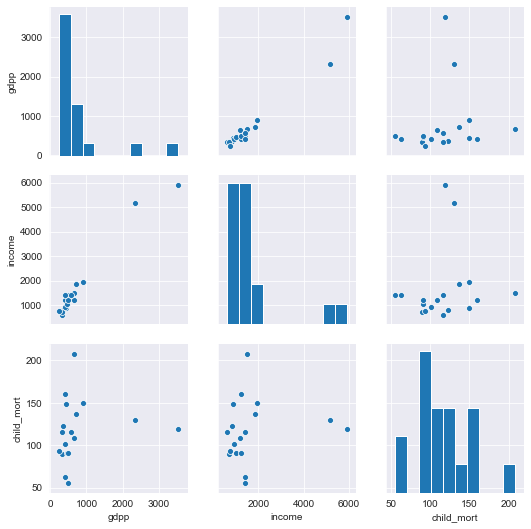

In [87]:
# plot pairplot to visualize the relationship between the 3 important variables chosen
sns.pairplot(x_vars=['gdpp', 'income', 'child_mort'], y_vars=['gdpp', 'income', 'child_mort'], data=country_df_final_list)
plt.show()

### Inferences:
With low income and low gdpp, child mortality increases, a clear indication of the countries which need aid the most.

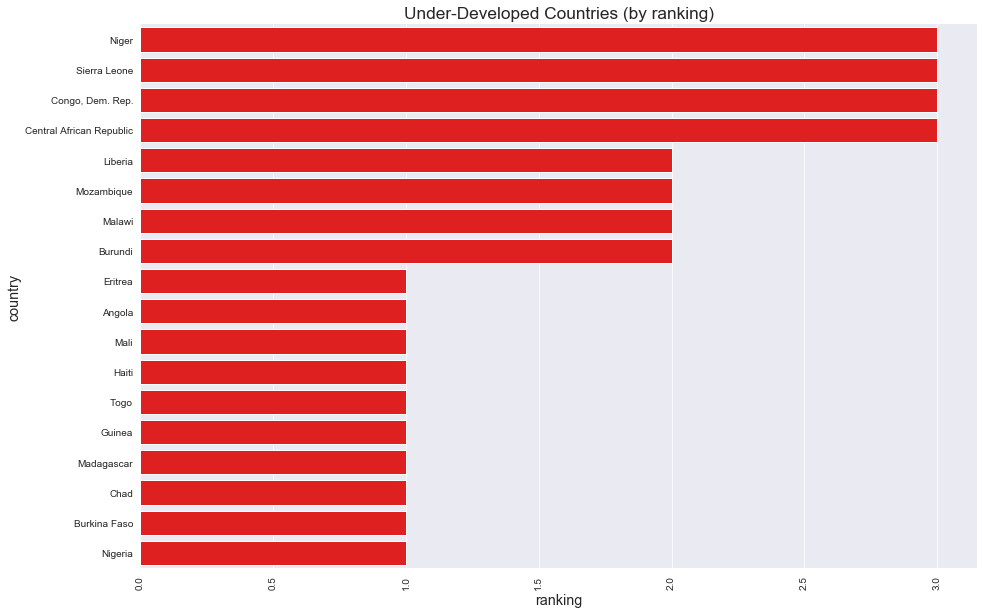

In [88]:
# plot all the under developed countries based on rankings
plt.figure(figsize=(15,10))
def final_plot(x_label, title):
    plt.title(title, fontsize='xx-large')
    plt.xlabel(x_label, fontsize='x-large')
    plt.ylabel(col, fontsize='x-large')
    sns.barplot(y='country', x=x_label, data=country_df_final_list, color='red')
    plt.xticks(rotation=90)
    sns.despine(left=True, bottom=True)
    
final_plot('ranking','Under-Developed Countries (by ranking)')

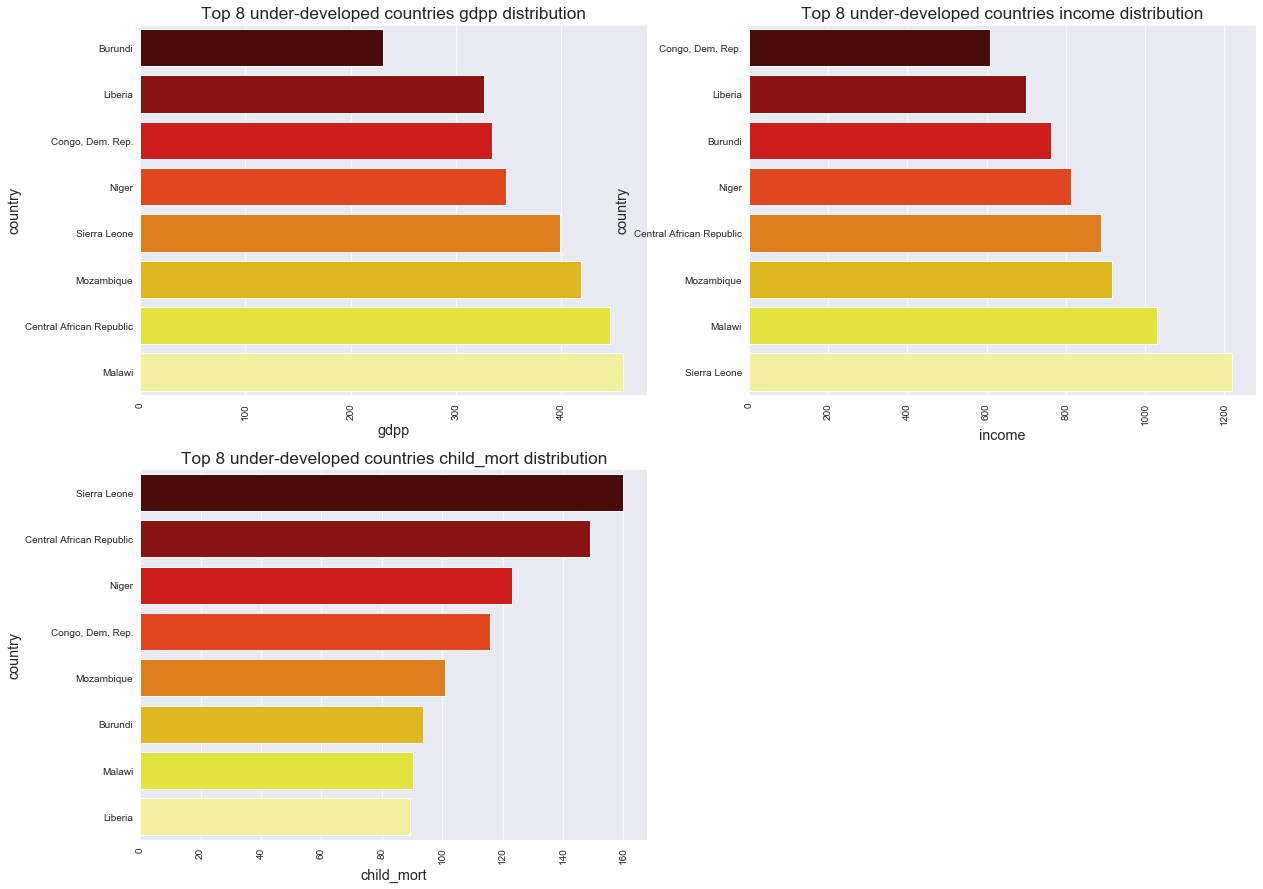

In [89]:
# distribution of top 8 countries based on:
# 1. gdpp
# 2. income
# 3. child_mort
country_df_top_8_final = country_df_final_list.sort_values(by='ranking', ascending=False).head(8)

plt.figure(figsize=(20,15))
plt.subplot(221)
plt.title('Top 8 under-developed countries gdpp distribution', fontsize='xx-large')
plt.xlabel('gdpp', fontsize='x-large')
plt.ylabel('country', fontsize='x-large')
sns.barplot(x='gdpp',y='country', data=country_df_top_8_final.sort_values(by='gdpp'), palette='hot')
plt.xticks(rotation=90)

plt.subplot(222)
plt.title('Top 8 under-developed countries income distribution', fontsize='xx-large')
plt.xlabel('income', fontsize='x-large')
plt.ylabel('country', fontsize='x-large')
sns.barplot(x='income',y='country', data=country_df_top_8_final.sort_values(by='income'), palette='hot')
plt.xticks(rotation=90)

plt.subplot(223)
plt.title('Top 8 under-developed countries child_mort distribution', fontsize='xx-large')
plt.xlabel('child_mort', fontsize='x-large')
plt.ylabel('country', fontsize='x-large')
sns.barplot(x='child_mort',y='country', data=country_df_top_8_final.sort_values(by='child_mort', ascending=False), palette='hot')
plt.xticks(rotation=90)

plt.show()

---

## Final List of countries that require dire aid:
1.               Sierra Leone
2.           Congo, Dem. Rep.
3.    Central African Republic
4.                       Niger
5.                     Liberia
6.                     Burundi
7.                      Malawi
8.                  Mozambique

---